<a href="https://colab.research.google.com/github/andreaaraldo/drt-accessibility/blob/main/DRT-Tuesday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!wget https://raw.githubusercontent.com/andreaaraldo/drt-accessibility/main/graph.py
!wget https://raw.githubusercontent.com/andreaaraldo/drt-accessibility/main/ptline.py
!wget https://github.com/andreaaraldo/drt-accessibility/blob/main/OpenStreetMap_Montreal.png?raw=true -O OpenStreetMap_Montreal.png

--2024-01-18 10:09:29--  https://raw.githubusercontent.com/andreaaraldo/drt-accessibility/main/graph.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9206 (9.0K) [text/plain]
Saving to: ‘graph.py.1’

graph.py.1          100%[===================>]   8.99K  --.-KB/s    in 0s      

2024-01-18 10:09:29 (60.9 MB/s) - ‘graph.py.1’ saved [9206/9206]

--2024-01-18 10:09:29--  https://raw.githubusercontent.com/andreaaraldo/drt-accessibility/main/ptline.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1098 (1.1K) [text/plain]
Saving to

In [74]:
import numpy as np
import networkx as nx
import sys
import random
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mping
import math

import graph
import ptline
import time

## 1. Load data ( Metro lines of Montreal )

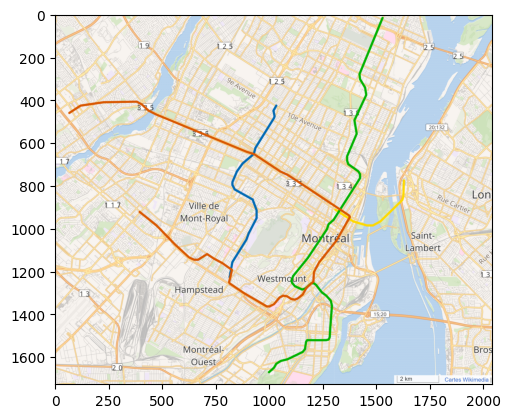

In [27]:
I = mping.imread('OpenStreetMap_Montreal.png')
plt.imshow(I)
plt.show()

In [28]:
metro_stations_line_1 = [[14.05154836,  2.22004959],
       [15.13790836,  2.73616959],
       [16.40851836,  3.37988959],
       [17.47221836,  3.64729959],
       [18.01638836,  3.91712959],
       [18.10515836,  4.92571959],
       [17.76756836,  5.73993959],
       [16.57472836,  6.18477958],
       [15.95520836,  7.01626959],
       [16.67042836,  7.62148959],
       [17.17587836,  8.20547959],
       [17.52006836,  8.55582959],
       [17.86689836,  9.01298959],
       [18.25563836,  9.32241959],
       [18.67550836,  9.78364959],
       [19.25245836, 10.18019959],
       [19.59719836, 10.74746959],
       [19.65296836, 11.79422959],
       [19.43340836, 12.69765959],
       [19.74151836, 13.26030959],
       [19.70125836, 14.01446959],
       [20.16622836, 14.78435959],
       [20.18756836, 15.73013959],
       [20.25642836, 16.56151959],
       [20.64989836, 17.20974959],
       [21.07493836, 17.94619959],
       [21.50316836, 18.73170959]]
len(metro_stations_line_1)

27

In [29]:
metro_stations_line_2 = [[ 0.92403836, 14.53674959],
       [ 2.36173836, 14.78556959],
       [ 5.34042836, 14.70845959],
       [ 6.89560836, 14.18925959],
       [ 8.23265836, 13.69205959],
       [10.09880836, 13.17780959],
       [11.23037836, 12.85979959],
       [12.86530836, 12.40494959],
       [13.87884836, 11.99772959],
       [14.63872836, 11.59941959],
       [15.83475836, 11.12267959],
       [16.37903836, 10.85119959],
       [17.78065836, 10.20538959],
       [18.67891836,  9.78210959],
       [19.16896836,  9.21395959],
       [18.84424836,  8.80706959],
       [18.45154836,  8.32185959],
       [17.99867836,  7.89824959],
       [17.57638836,  7.53073959],
       [16.94080836,  6.88745959],
       [16.57472836,  6.18477959],
       [15.86533836,  5.61398959],
       [13.98686836,  5.25989959],
       [12.21421836,  5.87677959],
       [11.34422836,  6.50641959],
       [10.75352836,  7.26794959],
       [10.18592836,  7.51962959],
       [ 8.58344836,  7.51951959],
       [ 7.62534836,  8.11439959],
       [ 6.16696836,  9.12716959],
       [ 5.29125836,  9.67485959]]
len(metro_stations_line_2)

31

In [30]:
metro_stations_line_3 = [[18.68309836,  9.77979959],
       [21.75055836,  9.47597959],
       [22.96374836, 10.84668959]]
len(metro_stations_line_3)

3

In [31]:
metro_stations_line_4 = [[11.34125836,  6.50311959],
       [11.82206836,  7.76184959],
       [12.44763836,  8.45946959],
       [12.98014836,  9.19998959],
       [12.74716836, 10.34948959],
       [11.83625836, 10.68916959],
       [11.69303836, 11.42825959],
       [12.20849836, 12.00685959],
       [12.87036836, 12.41550959],
       [13.50286836, 13.25161959],
       [14.17584836, 14.00676959],
       [14.39430836, 14.66038959]]
len(metro_stations_line_4)

12

In [32]:
nb_of_staions_each_metro_line = [ len(metro_stations_line_1),len(metro_stations_line_2),len(metro_stations_line_3),len(metro_stations_line_4) ]
print(nb_of_staions_each_metro_line)

cumsum_nb_of_staions_each_metro_line = np.cumsum( nb_of_staions_each_metro_line )
print(cumsum_nb_of_staions_each_metro_line)

[27, 31, 3, 12]
[27 58 61 73]


In [33]:
connection_between_lines = [[7, 47], [14, 40], [14, 58], [34, 69], [40, 58], [51, 61]]

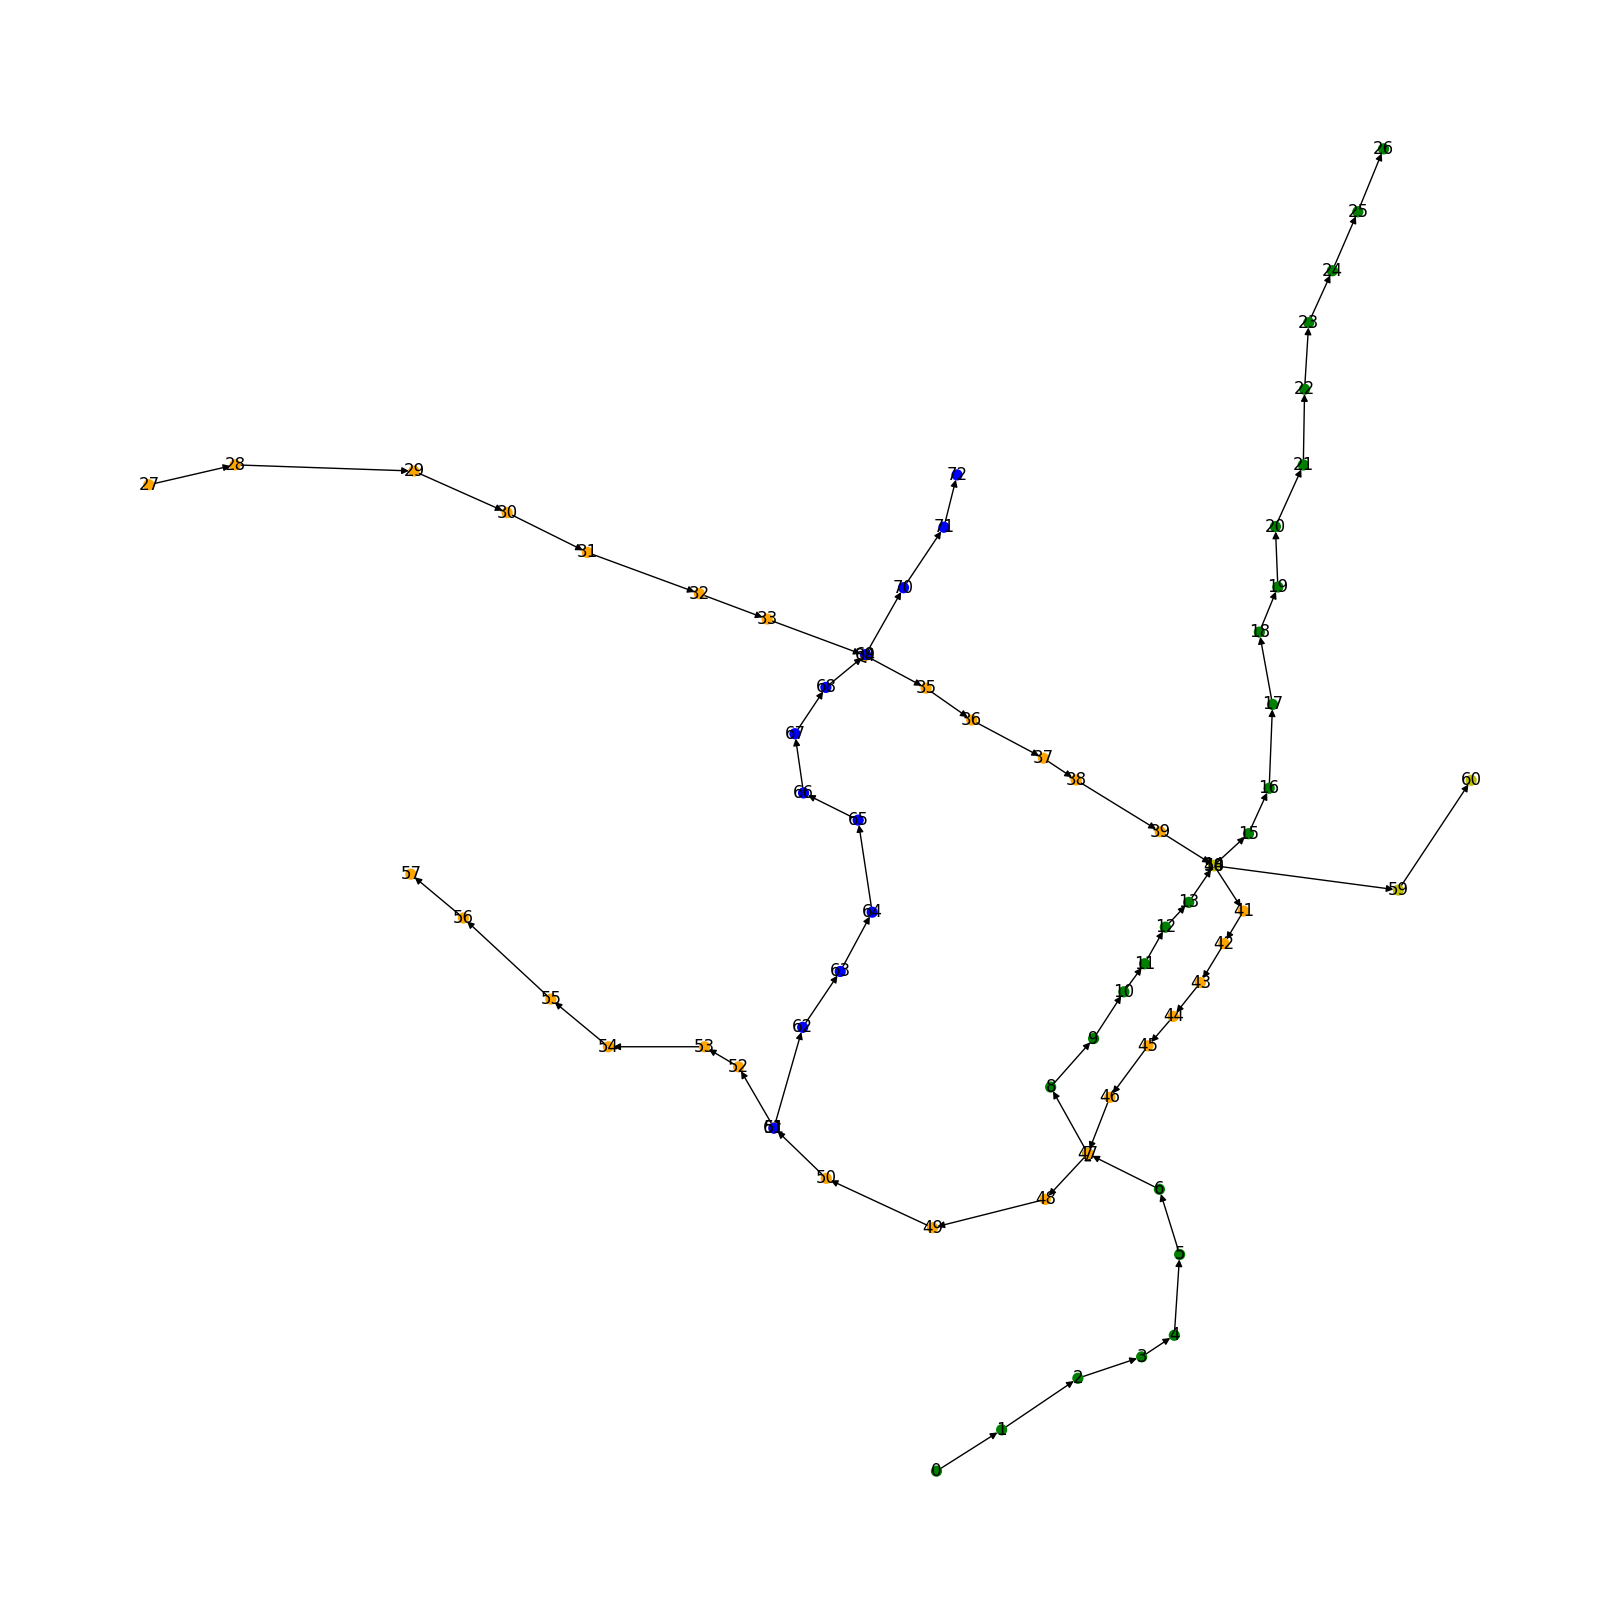

In [34]:
g = nx.DiGraph()

all_stations = metro_stations_line_1 +metro_stations_line_2 +metro_stations_line_3 +metro_stations_line_4
nb_of_all_stations = len(all_stations)


g.add_nodes_from([i for i in range(nb_of_all_stations)])

all_edges = [(i,i+1) for i in range(nb_of_all_stations) if i!= 26 and i!= 57 and i!= 60 and i!= 72] + connection_between_lines
g.add_edges_from(all_edges)

node_color=["green" for i in range(len(metro_stations_line_1))]+["orange" for i in range(len(metro_stations_line_2))]+["y" for i in range(len(metro_stations_line_3))]+["blue" for i in range(len(metro_stations_line_4))]
node_size=[50 for i in range(73)]

fig=plt.figure(figsize=(16,16))
nx.draw(g, all_stations, with_labels=True,node_color=node_color, node_size = node_size)
plt.show()

In [35]:
# metro dwell time for each station (hour)
dwell_time_1 = list(np.array([1,2,1,1,2,1,2,2,1,2,1,1,1,1,1,1,2,2,1,1,2,1,2,1,1,3])/60) #3 min/60 = 1/20 h

dwell_time_2 = list(np.array([1,3,2,1,2,1,2,1,2,1,5,1,1,1,2,2,1,2,1,2,2,2,1,2,1,1,1,2,1,2])/60)

dwell_time_3 = list(np.array([2,4])/60)

dwell_time_4 = list(np.array([1,1,2,3,2,1,1,1,2,1,2])/60)

In [36]:
node_ids_line_1 = [i for i in range(cumsum_nb_of_staions_each_metro_line[0])]
node_ids_line_2 = [i for i in range(cumsum_nb_of_staions_each_metro_line[0],cumsum_nb_of_staions_each_metro_line[1])]
node_ids_line_3 = [i for i in range(cumsum_nb_of_staions_each_metro_line[1],cumsum_nb_of_staions_each_metro_line[2])]
node_ids_line_4 = [i for i in range(cumsum_nb_of_staions_each_metro_line[2],cumsum_nb_of_staions_each_metro_line[3])]
list_waiting_time = [7/60,7/60,7.5/60,7.5/60] # 7.5 mins/60 = 0.125 hour
#create bus_line
metro_line_1 = ptline.PTline( 'Angrignon--Honoré-Beaugrand',list_waiting_time[0],
                                 node_ids_line_1,
                                 dict( zip(node_ids_line_1, metro_stations_line_1)),
                                 dwell_time_1 )


metro_line_2 = ptline.PTline( 'Côte-Vert--Montmorency',list_waiting_time[1],
                                 node_ids_line_2,
                                 dict( zip(node_ids_line_2, metro_stations_line_2)),
                                 dwell_time_2 )

metro_line_3 = ptline.PTline( 'Berri–UQAM--Longueuil–Université-de-Sherbrooke',list_waiting_time[2],
                                 node_ids_line_3,
                                 dict( zip(node_ids_line_3, metro_stations_line_3)),
                                 dwell_time_3 )

metro_line_4 = ptline.PTline( 'Snowdon--Saint-Michel',list_waiting_time[3],
                                 node_ids_line_4,
                                 dict( zip(node_ids_line_4, metro_stations_line_4)),
                                 dwell_time_4 )

In [37]:
#create Public transit graph
g  = graph.Graph( list_waiting_time )

#add each bus_line
g.add_metro_line(metro_line_1)
g.add_metro_line(metro_line_2)
g.add_metro_line(metro_line_3)
g.add_metro_line(metro_line_4)

#add transfer station and time  (7,47,list_waiting_time[1]+2/60) means from line_1 (station 7) tansfer to line_2 (station 47),
#                                the time cost is average waiting time of line 2 + 2 mins of walking
connection_and_transfer_time = [(7, 47,list_waiting_time[1]+2/60), (47, 7,list_waiting_time[0]+2/60),
                                (14, 40,list_waiting_time[1]+2/60),(40, 14,list_waiting_time[0]+2/60),
                                (14, 58,list_waiting_time[2]+2/60),(58, 14,list_waiting_time[0]+2/60),
                                (34, 69,list_waiting_time[3]+2/60),(69, 34,list_waiting_time[1]+2/60),
                                (40, 58,list_waiting_time[2]+2/60),(58, 40,list_waiting_time[1]+2/60),
                                (51, 61,list_waiting_time[3]+2/60),(61, 51,list_waiting_time[1]+2/60)]

g.add_connection(connection_and_transfer_time)
#np.save( 'test_set.npy',graph_dic )

In [38]:
def isHxOk(n_bus,area_descr,g):
    list_of_tiles = area_descr
    metro_station_id = findAssociatedStop(list_of_tiles, g)

    demand_total = 0.0
    for j in list_of_tiles:
        demand_ = calcualtePho(metro_station_id,j,g)*centroid_polulation[j]*0.16
        demand_total = demand_total + demand_

    DRT_s_1 = find_s1(list_of_tiles, g)
    metro_station_s_A_pos = np.array(g.metro_pos[metro_station_id])
    distance_station_area = np.linalg.norm( metro_station_s_A_pos - DRT_s_1 )


    hx = getHx(n_bus,demand_total,distance_station_area)
    if hx <= 0:
        return 0
    else:
        return 1

In [39]:
g.add_centroids()

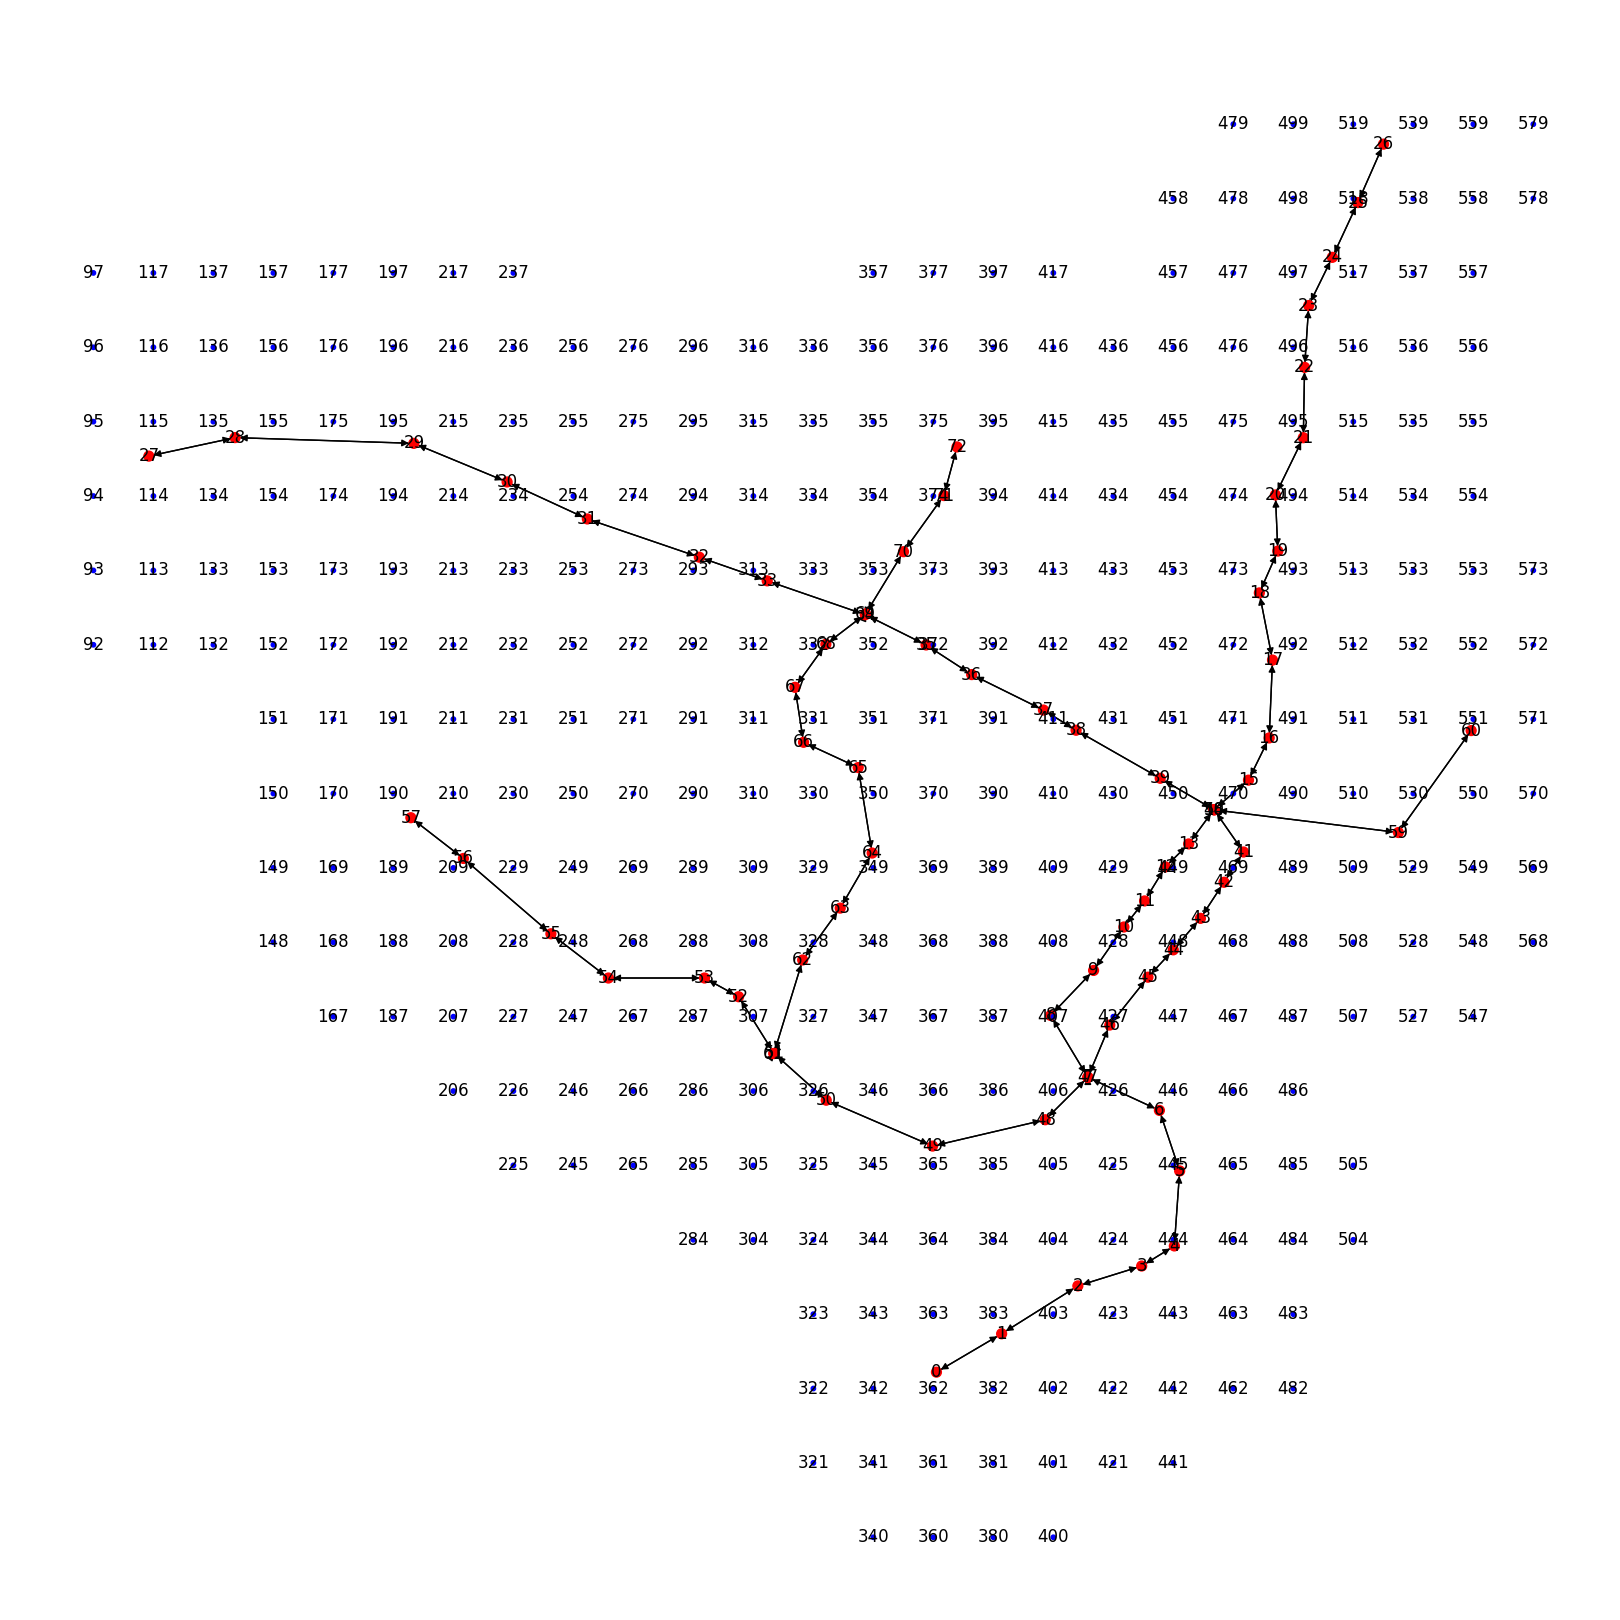

In [40]:
g.show()

In [41]:
g.add_edge_between_centroids()

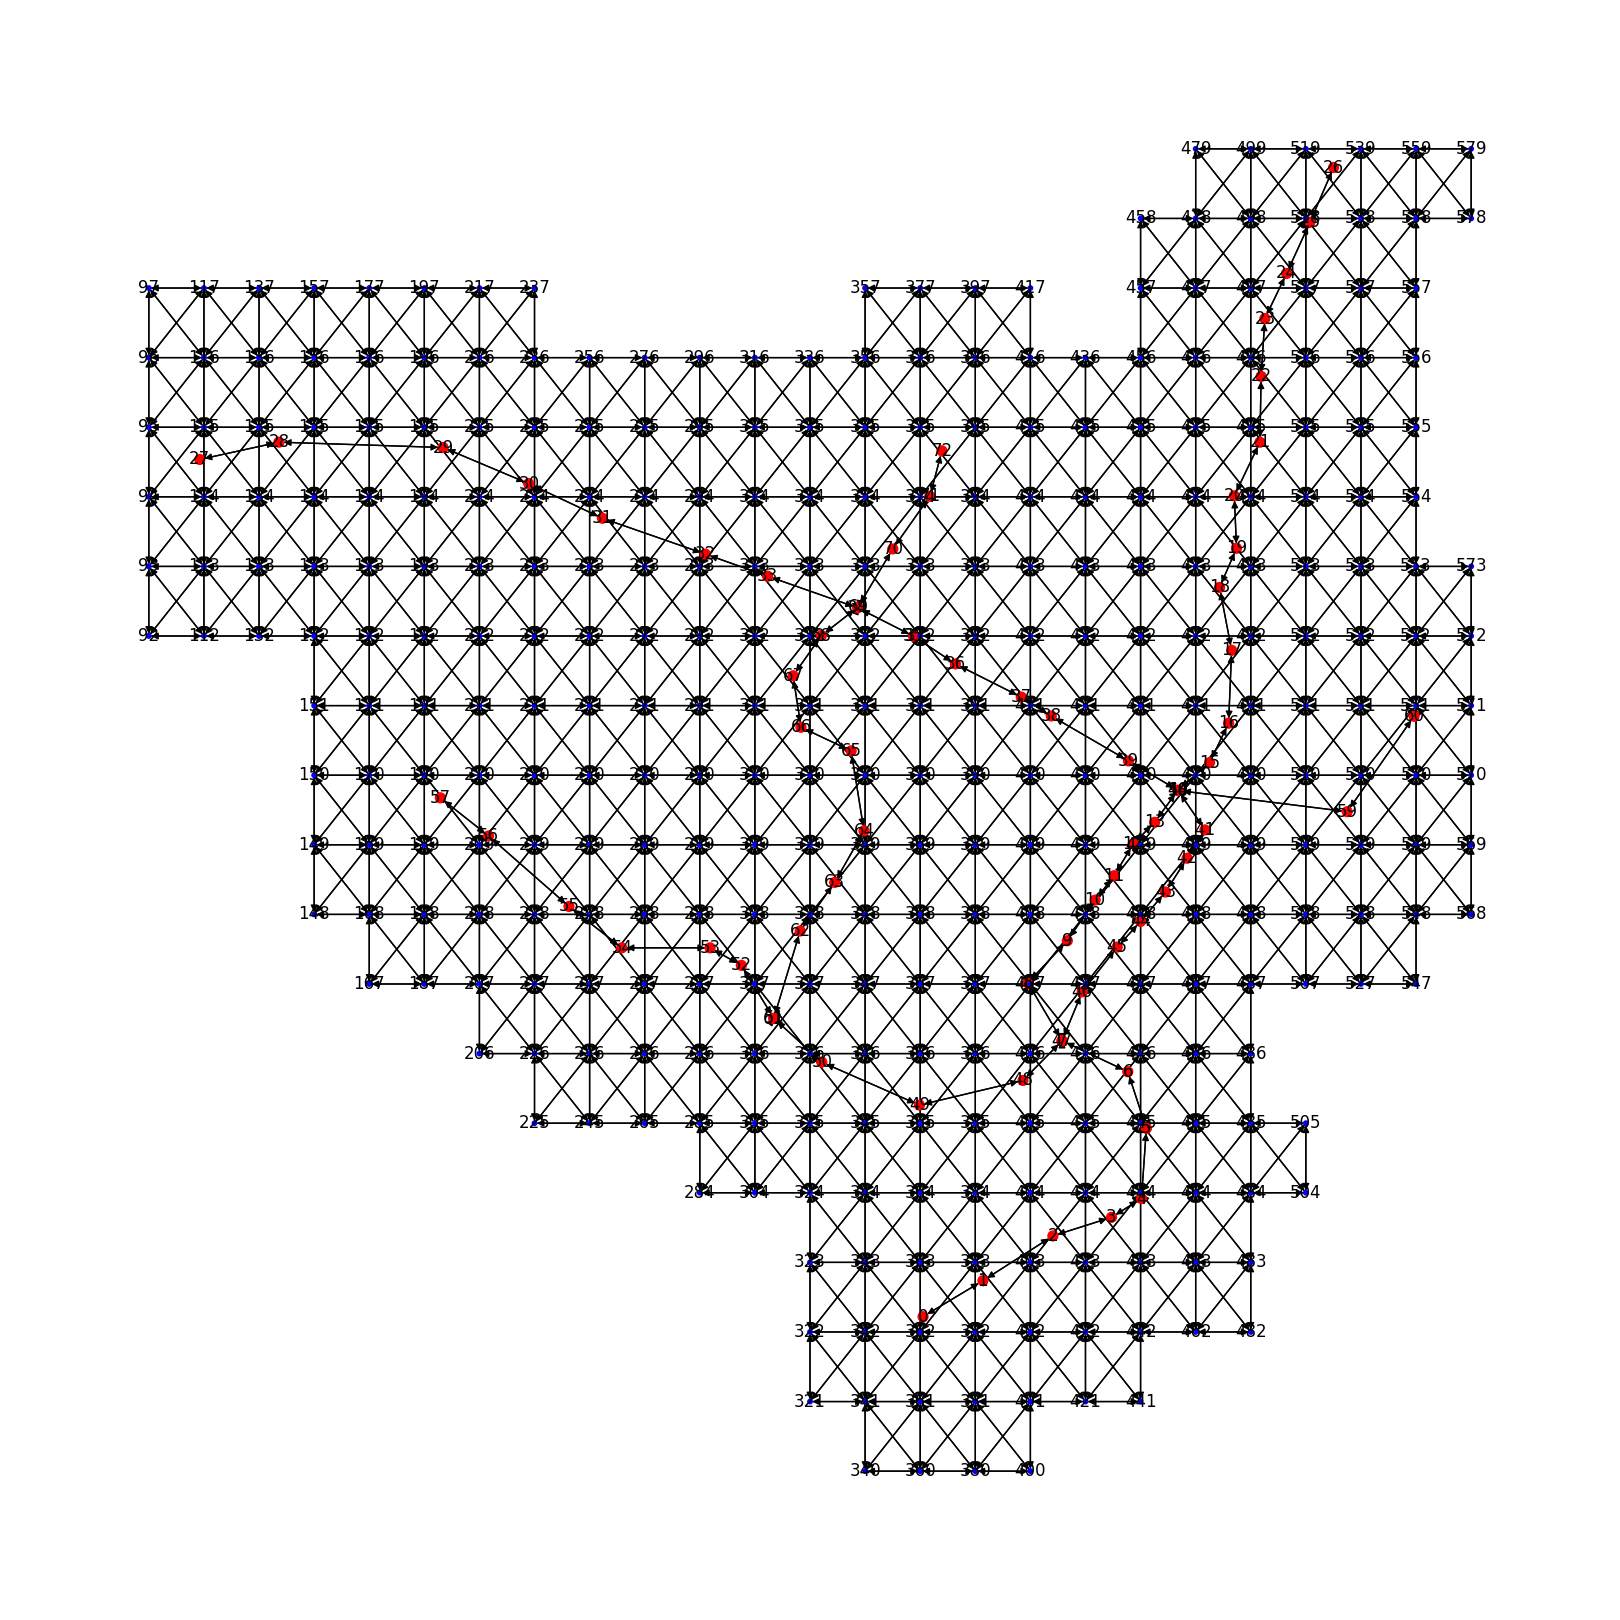

In [42]:
g.show()

In [43]:
g.add_edge_between_centroid_and_station()

In [44]:
import time
t_0 = time.time()
Initial_acc = np.array(g.get_acc()[1])
t_1 = time.time()
print("Time to compute accessibility: ", t_1 - t_0, " seconds")

Time to compute accessibility:  3.0448334217071533  seconds


In [45]:
centroid_polulation = g.centroid_polulation
total_polulation = g.total_polulation
print(total_polulation)

1180140


## 2. DRT allocation

In [46]:
# All alternative areas
list_area = []
for i in range(80,580, 20):
    if i in g.centroid_node and i+1 in g.centroid_node and i+20 in g.centroid_node and i+21 in g.centroid_node and i+40 in g.centroid_node and i+41 in g.centroid_node:

        list_area_population = [centroid_polulation[i],
                                centroid_polulation[i+1],
                                centroid_polulation[i+20],
                                centroid_polulation[i+21],
                                centroid_polulation[i+40],
                                centroid_polulation[i+41] ]

        if len( [ i for i in list_area_population if i == 0 ] ) <= 2:
            # We only consider areas that contain at most 2 0-population tiles
            list_area.append([i,i+1,i+20,i+21,i+40,i+41])

len(list_area)

# 0 zero population: 206
# 1 zero population: 27
# 2 zero population: 15
# 3 zero population: 3
# 4 zero population: 6
# 5 zero population: 4
# 6 zero population: 2
# 248 = 206 + 27 + 15

2

In [47]:
def find_s1(area,g):
  # Find point "s_1" (see the paper) that is the first point visited by the
  # DRT bus when it enters the area

  s1 = (g.centroid_to_pos[area[4]] + g.centroid_to_pos[area[5]])/2 + np.array([0.5,0])
  return s1

In [81]:
def findClosestStation(area,g):
    DRT_s_1 = find_s1(area,g)
    distance_station_area_list = []
    for i in g.metro_node:
        metro_pos_i = np.array(g.metro_pos[i])
        distance_station_area_list.append( np.linalg.norm( metro_pos_i - DRT_s_1 ) )

    closest_station = np.argmin( distance_station_area_list )
    return closest_station

In [82]:
def calcualtePho(metro_station_s_A,centroid_i,g):
    """
    Calculate what proportion of demands go from centroid_i to somewhere else via metro_station_s_A.
    """

    t_0 = time.time()
    beta = 0.12
    length =  nx.all_pairs_dijkstra_path_length(g.g)
    index = []
    for i, dict_ in length:
        if i == centroid_i:
            a = []
            for j in list(dict_.keys()):
                if j in g.centroid_node and j!=i:
                    index.append( j )
                    a.append( centroid_polulation[j]*np.exp( - beta*dict_[j]  ) )
            a = np.array(a)
    b = a/np.sum(a)
    c = {}
    for k in range(len(b)):
        c[index[k]] = b[k] # if index[k] = j, b[k] represents the proportion of demands go from centroid_i centroid j.

    pho = 0.0
    path = nx.all_pairs_dijkstra_path(g.g)
    for i, dict_ in path:
        if i== centroid_i:
            for j in dict_.keys():
                if j in g.centroid_node and j!=i and metro_station_s_A in dict_[j]:
                    pho = pho + c[j]

    t_1 = time.time()
    print("Time for calcualtePho(): ",t_1-t_0)
    return pho

In [83]:
from sympy import *

def getHx(n_bus,pho,distance_station_area):
    """
    Solve the system of equations to find the headway of the DRT into an area.
    Returns the headway and cycle length in hours
    """
    v_bus = 25 #25 km/h
    l = 1      #1 km
    tau_s = 32/3600 #32 s
    tau_T = 60/3600 #60 s
    h = symbols('h')
    #TODO: for the moment, we assume that the DRT demand is symmetric, i.e.,
    #  the demand out (pax using DRT as first mile) = demand in (pax using DRT in their last mile).
    #  This assumption might not be true and should be removed
    h_x = solve( (2*distance_station_area + 6*l*(2*pho*l*l*h)/(2*pho*l*l*h+1)+(2*pho*l*l*h)*l/3+l*4/3)/v_bus + tau_s*(2*pho*l*l*h) + tau_T - n_bus*h  , h)

    #TODO: Take the smallest postive solution instead of what we do now
    if len(h_x) == 0:
        print('bug h_x no solution!') #TODO: We should rise an exception instead
    elif len(h_x) == 1:
        hx = float(h_x[0])
        cycle_length = ( n_bus*hx +  tau_T + tau_s*(2*pho*l*l*h) ) * v_bus
        return hx, cycle_length
    else:
#         print('2 solutions',float(h_x[0]),float(h_x[1]))
        hx = max( float(h_x[0]),float(h_x[1]) )
        cycle_length = ( n_bus*hx +  tau_T + tau_s*(2*pho*l*l*h) ) * v_bus
        return hx, cycle_length

In [84]:
def assignDRT(n_bus,area,g, assign_iterations):
    """
    Assign DRT to an area and updates demand and performance indicators therein.
    Returns the headway after traffic assignment convergence
    area: is [list_of_tiles_belonging_to_an_area]
    """
    # Assign n_bus DRT buses to current worst area worst_.
    v_bus = 25 #25 km/h
    metro_station = findClosestStation(area,g)
    hx = 0

    DRT_s_1 = find_s1(area,g)
    metro_station_s_A_pos = np.array(g.metro_pos[metro_station])
    distance_station_area = np.linalg.norm( metro_station_s_A_pos - DRT_s_1 )

    dict_centroid_walk = {}
    for i in area:
        dict_centroid_walk[i] = np.linalg.norm( metro_station_s_A_pos - g.centroid_to_pos[i] )/4.5 #walking speed = 4.5 km/h
    # For the moment we have a maximum limit of assignment iterations because
    # we do all-or-nothing assingment, we in few cases causes the typical
    # instability and we could go on an infinite amount of time
    #TODO: improve traffic assignment
    demand_list_all_steps =  list()
    for i in range(assign_iterations):
        print('iteration',i)
        if i < assign_iterations-1:# calculate demand via shortest path
            demand_total = 0.0
            demand_list = list()
            for tile in area:
                trip_generation_rate = 0.16
                pt_mode_share = 0.124
                print("Calculating pho for tile ",tile)
                demand_ = calcualtePho(metro_station,tile,g)*centroid_polulation[tile]*trip_generation_rate*pt_mode_share  # xxxx demands/km2/hour
                demand_total = demand_total + demand_
                demand_list.append( demand_ )
        else:# the last itearation, calculate demand by taking average of the demands before
            demand_list = list( np.mean( np.array(demand_list_all_steps), axis=0 ) )
            demand_total = np.sum( demand_list )

        hx, cycle_length = getHx(n_bus,demand_total,distance_station_area)
        if i == assign_iterations-1:
            print( 'headway hx', hx ,'h')
            print( 'cycle_length', cycle_length ,'km')

        if hx <= 0:
            continue #need to continue to the next iteration
        else:
            #calculate alpha from demand_list current
            alpha_0_list = []
            #aa: why this strange order? Please, make the code generic for any
            # assign_iterations values. It should not just work for
            # assign_iterations values=5.
            # Please remove any hardcoded value.
            phi_i_list = [demand_list[5],demand_list[3],demand_list[1],demand_list[0],demand_list[2],demand_list[4]]
            for i in range(len(phi_i_list)):
                if i==5:
                    alpha_0_list.append( phi_i_list[i]/2/np.sum(phi_i_list) )
                else:
                    alpha_0_list.append( (phi_i_list[i]/2 + np.sum(phi_i_list[i+1:]))/np.sum(phi_i_list) )
            list_1 = [alpha_0_list[3],alpha_0_list[2],alpha_0_list[4],alpha_0_list[1],alpha_0_list[5],alpha_0_list[0]]

            #update demand_list by comparing time cost of walking and DRT
            centroids_choose_walking = []
            for tile in range(len(area)):
                j = area[tile]
                time_alpha = list_1[tile]

                #aa: Please replace the line before with an appropriately defined
                # function (like I did for find_s1(..) )
                t_DRT = hx/2+ time_alpha*(hx*n_bus-2*distance_station_area/v_bus) + distance_station_area/v_bus

                t_walking = dict_centroid_walk[j]
                if t_walking < t_DRT:
                    demand_list[tile] = 0.0
                    centroids_choose_walking.append( j )

            demand_list_all_steps.append( demand_list )

            #update new alpha from new demand_list
            alpha_0_list = []
            phi_i_list = [demand_list[5],demand_list[3],demand_list[1],demand_list[0],demand_list[2],demand_list[4]]
            for i in range(len(phi_i_list)):
                if i==5:
                    alpha_0_list.append( phi_i_list[i]/2/np.sum(phi_i_list) )
                else:
                    alpha_0_list.append( (phi_i_list[i]/2 + np.sum(phi_i_list[i+1:]))/np.sum(phi_i_list) )
            list_1 = [alpha_0_list[3],alpha_0_list[2],alpha_0_list[4],alpha_0_list[1],alpha_0_list[5],alpha_0_list[0]]

            #update ingress/egress time centroid <--> metro station
            for tile in range(len(area)):
                j = area[tile]
                time_alpha = list_1[tile]
                #print('centroid and time',j,  time_alpha*(hx*n_bus-2*distance_station_area/v_bus) + distance_station_area/v_bus)
                if j in centroids_choose_walking:
                    t_walking = dict_centroid_walk[j]
                    g.add_connection( [(j,metro_station, t_walking)] )
                    g.add_connection( [(metro_station,j, t_walking)] )
                else:
                    t_DRT = hx/2+ time_alpha*(hx*n_bus-2*distance_station_area/v_bus) + distance_station_area/v_bus
                    g.add_connection( [(j,metro_station, t_DRT)] )
                    g.add_connection( [(metro_station,j, t_DRT)] )


    return hx

In [85]:
def testHx(n_bus,area,g):

    metro_station = findClosestStation(area, g)

    demand_total = 0.0
    for j in worst_[1]:
        demand_ = calcualtePho(metro_station,j,g)*centroid_polulation[j]*0.16
        demand_total = demand_total + demand_

    DRT_s_1 = find_s1(area,g)
    metro_station_s_A_pos = np.array(g.metro_pos[metro_station])
    distance_station_area = np.linalg.norm( metro_station_s_A_pos - DRT_s_1 )


    hx, cycle_length = getHx(n_bus,demand_total,distance_station_area)
    if hx <= 0:
        return 0
    else:
        return 1

In [86]:
def allocateDRT(allocation):
  for area_id in allocation:
    try:
      area = list_area[area_id]
    except IndexError:
      print("Area ", area_id, " does not exist")

    print ("Assigning buses to area ", list_area[area_id])
    hx = assignDRT(allocation[area_id],list_area[area_id],g, \
                   assign_iterations=5)
    print ("headway of area ", area_id, " is ", hx*60," minutes\n")

In [87]:
allocation = {
    0 : 200,
    1 : 4000
 }

t_0 = time.time()
allocateDRT(allocation)

t_1 = time.time()
print("Time for assigning DRT: ",t_1-t_0)

Assigning buses to area  [340, 341, 360, 361, 380, 381]
iteration 0
Calculating pho for tile  340
Time for calcualtePho():  5.7824108600616455
Calculating pho for tile  341
Time for calcualtePho():  6.895117521286011
Calculating pho for tile  360
Time for calcualtePho():  5.98172664642334
Calculating pho for tile  361
Time for calcualtePho():  6.668437957763672
Calculating pho for tile  380
Time for calcualtePho():  6.10839581489563
Calculating pho for tile  381
Time for calcualtePho():  6.038638114929199
iteration 1
Calculating pho for tile  340
Time for calcualtePho():  6.297142505645752
Calculating pho for tile  341
Time for calcualtePho():  5.487388849258423
Calculating pho for tile  360
Time for calcualtePho():  7.005274772644043
Calculating pho for tile  361
Time for calcualtePho():  5.634563446044922
Calculating pho for tile  380
Time for calcualtePho():  7.070714950561523
Calculating pho for tile  381
Time for calcualtePho():  5.892462253570557
iteration 2
Calculating pho for t

In [ ]:
def findWorstArea(g):
# Find area with worst Score and its nearest metro station

    alpha = 0.25

    list_acc =  g.get_acc()[1]

    # Get the ranks of centroids related to accessibility and population
    # index_acc_dict: dict{ centroid index -> rank of acc }
    # index_popu_dict: dict{ centroid index -> rank of population }
    index_acc = np.argsort(list_acc)
    index_popu = np.argsort(list(centroid_polulation.values()))
    index_acc_dict = {}
    index_popu_dict = {}
    for i in range(len(g.centroid_node)):
        index_acc_dict[g.centroid_node[index_acc[i]]] = i
        index_popu_dict[g.centroid_node[index_popu[i]]] = i


    score_list = []
    for area_ in list_area:
        score_ = [] # list of scores of the tiles belonging to area
        for i in area_:
            if centroid_polulation[i] == 0:
                score_.append(0)
            else:
                # score(c_i) = alpha*population_rank(c_i) + （1-alpha)*(total_nb_centroids - accessibility_rank(c_i) )
                score_.append( alpha*index_popu_dict[i]+ (1-alpha)*(len(g.centroid_node)-index_acc_dict[i]) )

        score_list.append( np.sum(score_)/len(np.nonzero(score_)[0]) )

    worst_area = list_area[np.argmax(score_list)]

    # The following line is not strictly needed
    score_list.sort(reverse=True) #print('worst 30 score_list :',score_list[:30])

    closest_station = findClosestStation(area,g)

    return [closest_station,worst_area] #[ nearest metro station, worst area ]

In [ ]:
### MAIN PROCEDURE

list_opt_acc = {}


dict_worst_station_area = {}
n_bus = 1500
steps = int(n_bus/10)
for i in range(steps):
    print('Step',i,':')
    worst_ = findWorstArea(g)
    print('    Current worst area',worst_[1],' and metro station nearest:',worst_[0])
    print('    Accessibility before',[g.centroid_to_acc[p] for p in worst_[1]] )

    metro_station = worst_[0]
    first_centroid = worst_[1][0] #1st centroid of the area
    if (metro_station,first_centroid) in dict_worst_station_area.keys():
        # we already previously added DRT buses to this area. We just increase by 10

        dict_worst_station_area[ (metro_station,first_centroid) ] = dict_worst_station_area[ (worst_[0],worst_[1][0]) ] + 10
    else:
        dict_worst_station_area[ (metro_station,first_centroid) ] = 10

    print('    DRT allocation:')
    for key,value in dict_worst_station_area.items():
        print('        Metro station and 1st centroid {key} -> {value} buses'.format(key = key, value = value))

    if testHx(dict_worst_station_area[ (worst_[0],worst_[1][0]) ],worst_[1],g) == 0:
        print('    Nb of buses too small for (station, area) {key}  -----> Not change'.format(key = (worst_) ) )
        print('--------------------------------------------------------------------------')

        # To keep historical data, we save our intermediary results every 5 steps
        if (i+1)%5 == 0:
            list_opt_acc[10*(i+1)] = np.array( g.get_acc()[1] )


        continue # This "continue" is useless
    else:
        DRT_buses_currently_deployed_in_the_area = dict_worst_station_area[ (metro_station,first_centroid) ]
        assignDRT(DRT_buses_currently_deployed_in_the_area, worst_[1], g)
        ooo = g.get_acc()
        print('    Acc after',[g.centroid_to_acc[p] for p in worst_[1]] )
        print('----------------------------------------------------------------')

        if (i+1)%5 ==0:
            list_opt_acc[10*(i+1)] = np.array( g.get_acc()[1] )

In [ ]:
t_1 = time.time()
print(t_1-t_0)

In [ ]:
# We print the history of the optimization
# list_opt_acc is a dictionary of {(DRT used in total, [list of acc. of all tiles])}
list_opt_acc.keys()

In [ ]:
@

## 3. Analyze results

In [ ]:
DRT allocation:
    Bus stop 28  [] -> 210 buses          people/bus
    in-bus time（） [0.83,0.98,0.53,1.01,0.24,1.13] pho 2812


In [ ]:
in_bus_time = np.array([
    [0.83,0.98,0.53,1.01,0.24,1.13],
    [0.51,0.61,0.37,0.70,0.18,0.79],
    [0.25,0.25,0.25,0.25,0.19,0.37],
    [0.14,0.27,0.13,0.55,0.13,0.75],
    [0.65,0.70,0.52,0.79,0.25,0.92],
    [0.48,0.55,0.40,0.61,0.23,0.66],
    [3.02,5.36,0.96,7.30,0.09,8.08],
    [0.79,1.24,0.57,1.81,0.24,2.27],
    [0.50,1.25,0.10,2.50,0.10,3.80],
    [1.29,1.67,0.90,1.83,0.44,1.84],
    [0.12,0.17,0.07,1.51,0.03,4.13]
])

In [ ]:
in_bus_time

In [ ]:
poi11 =np.reshape(in_bus_time,-1)
plt.bar(range(len(poi11)),poi11)

In [ ]:
len(people_per_bus) + 1

In [ ]:
people_per_bus = [ 14,11,28,23,12,36,21,19,21,16 ]

In [ ]:
min(people_per_bus)

In [ ]:
max(people_per_bus)

In [ ]:
np.mean(people_per_bus)

In [ ]:
plt.bar(range(len(people_per_bus)),people_per_bus)

In [ ]:
plt.boxplot(people_per_bus)

In [ ]:
3135.6175957356027 / 50

In [ ]:
@